In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID',axis=1,inplace=True)

In [5]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
print('Unique value in Genre',df['Genre'].unique())
df['Genre'] = pd.get_dummies(df['Genre'],drop_first=True)

Unique value in Genre ['Male' 'Female']


In [7]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [8]:
print('Unique value in Genre',df['Genre'].unique())

Unique value in Genre [1 0]


In [9]:
df.shape

(200, 4)

In [10]:
colors = ['red','green','blue','brown','orange']

In [11]:
def elbow_plot(X):
    #selecting k value fot k means clustering
    wcss = []
    for i in range(1,11):
        model = KMeans(n_clusters=i,random_state=0)
        model.fit(X)
        wcss.append(model.inertia_)
        
    plt.plot(range(1,11),wcss)
    plt.xlabel('k_value')
    plt.ylabel('Error')
    plt.title('Elbow plot')
    plt.show()

In [12]:
def visualize_clusters(model,X,k_pred,k_value):
    
    for i in range(k_value):
        #ploting individual cluster one by one
        plt.scatter(X[k_pred==i,0],X[k_pred==i,1],s=50,c=colors[i])
        #ploting the centrolds
        plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='black')
        
        plt.xlabel('Annual Income(k$)')
        plt.ylabel('spending score(1-100)')
        plt.title('Clusters')
        plt.legend(range(k_value))
        plt.show()

C:\Users\sudar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


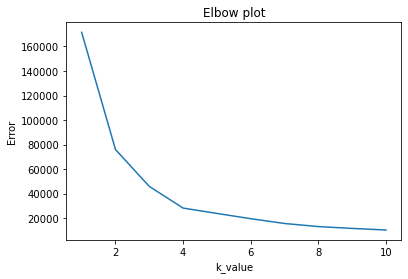

In [13]:
#taking annualincome(k$) and spending score

X=df.iloc[:,[1,3]].values
elbow_plot(X)

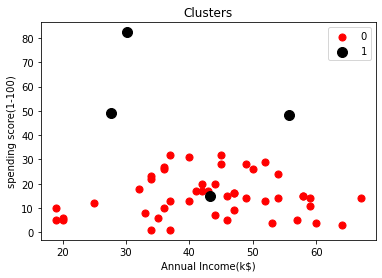

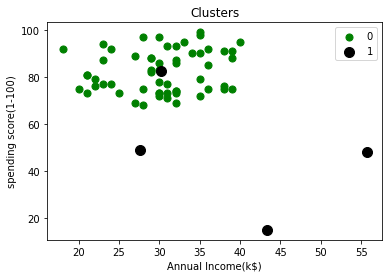

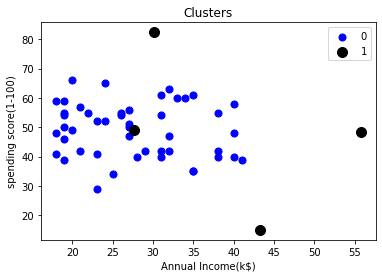

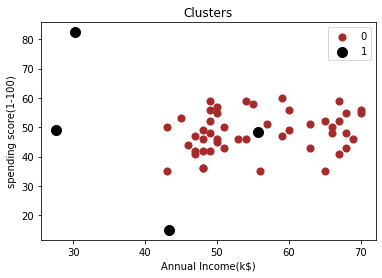

In [14]:
k_value = 4
model=KMeans(n_clusters=k_value,random_state=0)
k_pred=model.fit_predict(X)
visualize_clusters(model,X,k_pred,k_value)